# Normal Equation

## To find the value of θ that minimizes the cost function, there is a closed-form solution,in other words, a mathematical equation that gives the result directly. This is called the Normal Equation

# $\displaystyle h_{\theta}(x)=\theta_0+\theta_1x \mbox{ and } J(\theta_0,\theta_1)=\frac{1}{2m}\sum_{i=1}^{m} \left(h_{\theta}(x^{(i)})-y^{(i)}\right)^2$

# $θ=(X^{T}X)^{-1}X^{T}Y$

## pros:
### 1)Don't need to iterate
### 2)No need to choose alpha parameter
## Cons:
### 1)Works slow when n is large

### Derivation

https://eli.thegreenplace.net/2014/derivation-of-the-normal-equation-for-linear-regression

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

In [3]:
data=pd.read_csv('salary.csv')
data.head()

,YearsExperience,Salary,age,company_change,type
0,1.1,39343,21,1,junior
1,1.3,46205,31,0,middle
2,1.5,37731,29,1,middle
3,2.0,43525,30,1,middle
4,2.2,39891,27,1,middle


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 5 columns):
YearsExperience    30 non-null float64
Salary             30 non-null int64
age                30 non-null int64
company_change     30 non-null int64
type               30 non-null object
dtypes: float64(1), int64(3), object(1)
memory usage: 1.2+ KB


In [5]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
YearsExperience,30.0,5.313333,2.837888,1.1,3.20,4.7,7.70,10.5
Salary,30.0,76003.000000,27414.429785,37731.0,56720.75,65237.0,100544.75,122391.0
age,30.0,34.266667,7.031620,21.0,29.00,34.0,37.75,56.0
company_change,30.0,0.400000,0.498273,0.0,0.00,0.0,1.00,1.0


In [6]:
data.isnull().sum()

YearsExperience    0
Salary             0
age                0
company_change     0
type               0
dtype: int64

In [7]:
data.corr()

,YearsExperience,Salary,age,company_change
YearsExperience,1.000000,0.978242,0.641433,-0.476989
Salary,0.978242,1.000000,0.656129,-0.552734
age,0.641433,0.656129,1.000000,-0.444854
company_change,-0.476989,-0.552734,-0.444854,1.000000


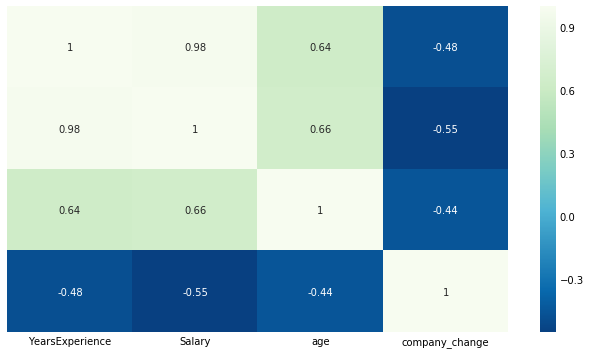

In [8]:
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(),yticklabels=False,annot=True,cmap='GnBu_r')

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
x=np.array(data['Salary'])
y=np.array(data['YearsExperience'])

In [11]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=32)

In [19]:
class Linear_regression:

    def fit(self,x_train,y_train):
        print(x_train)
        x_new=np.c_[np.ones((len(x_train),1)),x_train]
        print(x_new)
        self.m_c=np.linalg.inv(x_new.T.dot(x_new)).dot(x_new.T).dot(y_train)
        self.m=self.m_c[1:]
        self.c=self.m_c[0:1]
        print(self.m,self.c)

    def predict(self,x_test):
        x_new_test=np.c_[np.ones((len(x_test),1)),x_test]
        y_pred=x_new_test.dot(self.m_c)
        return y_pred

In [20]:
model=Linear_regression()

In [21]:
model.fit(x_train,y_train)

[ 83088  81363  61111  91738  64445  66029  37731  46205 116969 122391
  39891  57189  63218 112635  43525  54445  93940 109431 101302  56642
  55794 113812]
[[1.00000e+00 8.30880e+04]
 [1.00000e+00 8.13630e+04]
 [1.00000e+00 6.11110e+04]
 [1.00000e+00 9.17380e+04]
 [1.00000e+00 6.44450e+04]
 [1.00000e+00 6.60290e+04]
 [1.00000e+00 3.77310e+04]
 [1.00000e+00 4.62050e+04]
 [1.00000e+00 1.16969e+05]
 [1.00000e+00 1.22391e+05]
 [1.00000e+00 3.98910e+04]
 [1.00000e+00 5.71890e+04]
 [1.00000e+00 6.32180e+04]
 [1.00000e+00 1.12635e+05]
 [1.00000e+00 4.35250e+04]
 [1.00000e+00 5.44450e+04]
 [1.00000e+00 9.39400e+04]
 [1.00000e+00 1.09431e+05]
 [1.00000e+00 1.01302e+05]
 [1.00000e+00 5.66420e+04]
 [1.00000e+00 5.57940e+04]
 [1.00000e+00 1.13812e+05]]
[9.89988895e-05] [-2.26884765]


In [15]:
y_pred=model.predict(x_test)

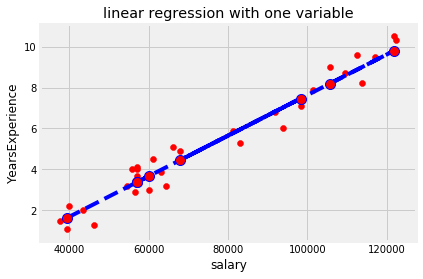

In [16]:
plt.plot(x_test,y_pred,marker='o',
         color='blue',markerfacecolor='red',
         markersize=10,linestyle='dashed')
plt.scatter(x,y,marker='o',color='red')
plt.xlabel("salary")
plt.ylabel("YearsExperience")
plt.title("linear regression with one variable")
plt.show()

In [17]:
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.metrics import explained_variance_score

In [18]:
print(mean_squared_error(y_test,y_pred))
print(np.sqrt(mean_squared_error(y_test,y_pred)))
print(mean_absolute_error(y_test,y_pred))
print(explained_variance_score(y_test,y_pred))
print(r2_score(y_test,y_pred))

0.39340493972627616
0.62722000902895
0.6103992938196761
0.9604279582812163
0.9550257825724208
